# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/the-world-factbook/

## Goal: 

Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? 

----

## Imports and Data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


Let's create a histogram of Population column

<AxesSubplot:xlabel='Population', ylabel='Count'>

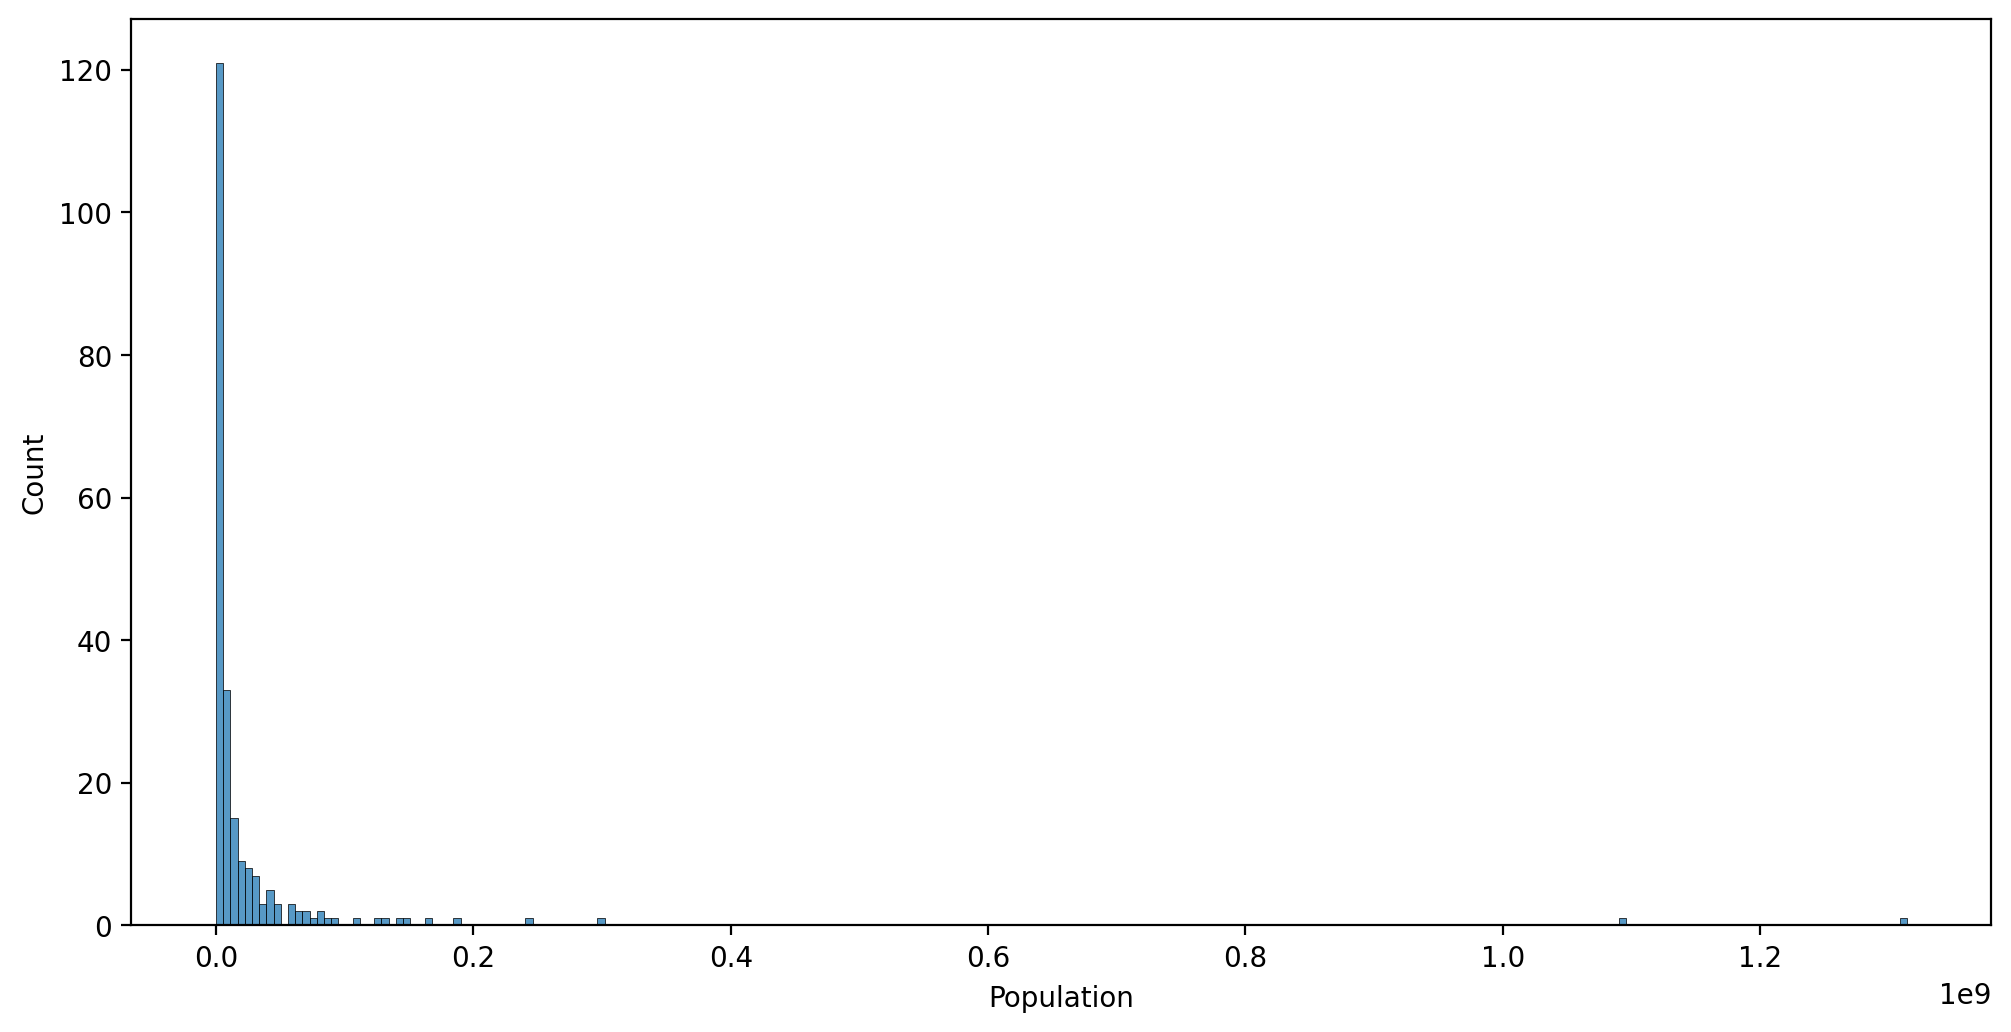

In [6]:
plt.figure(figsize=(12, 6),dpi = 200)
sns.histplot(data = df, x= 'Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

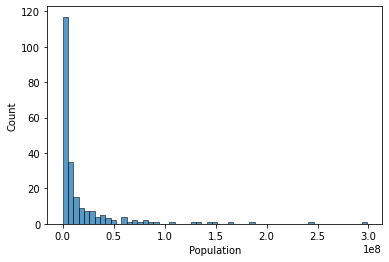

In [7]:
#Histogram looks skewed due to a few large countries (China, India etc.)
#Lets limit X to 0.5 bil
sns.histplot(data = df[df['Population']<500000000], x= 'Population')

Let's create a bar chart for mean GPD per region

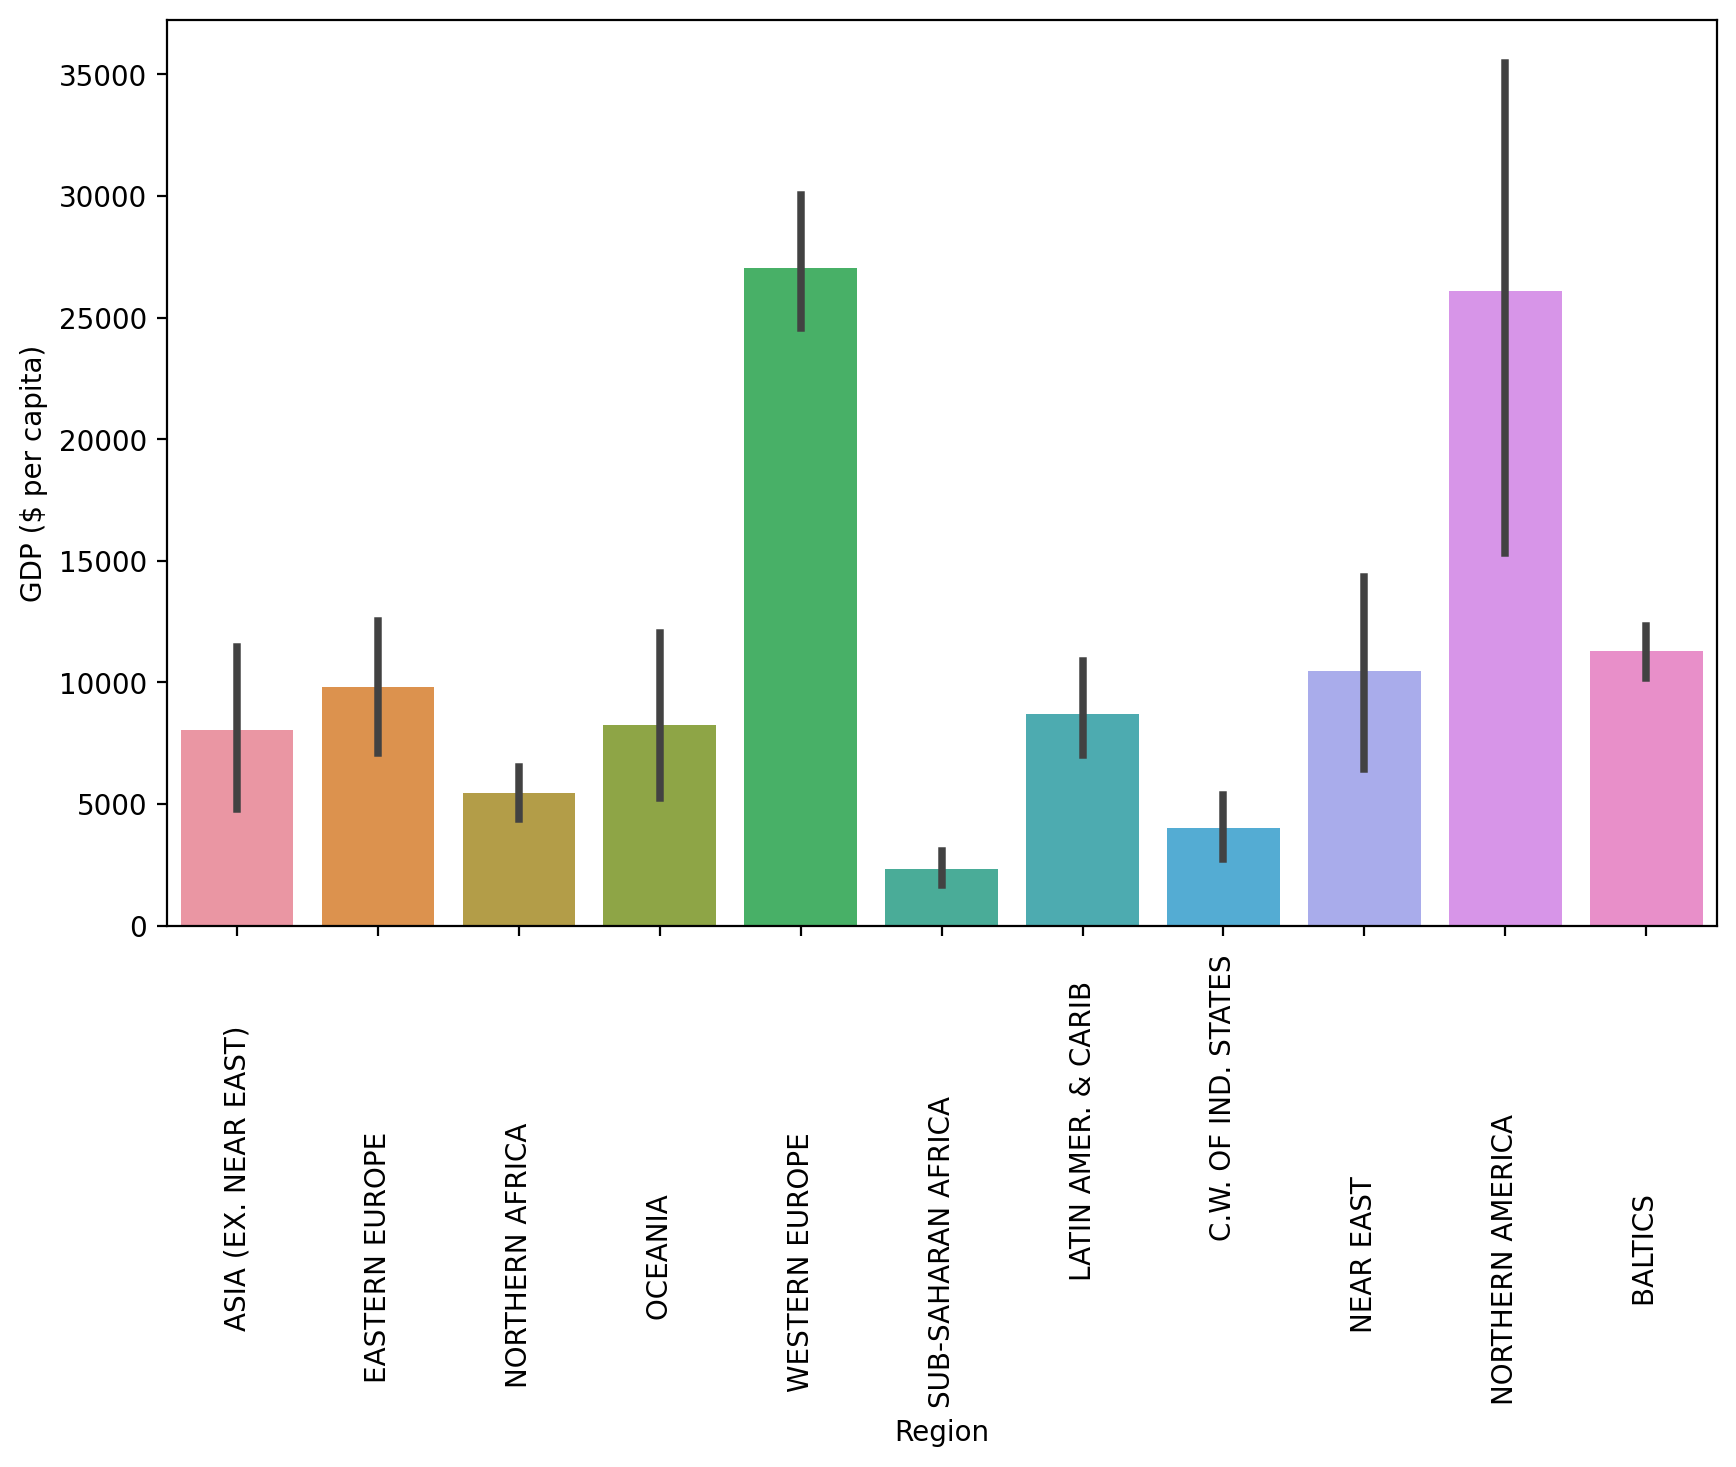

In [8]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=df, y='GDP ($ per capita)', x = 'Region', estimator=np.mean)
plt.xticks(rotation=90);

Let's create a scatterplot for showing the relationship between Phones per 1000 people and GDP

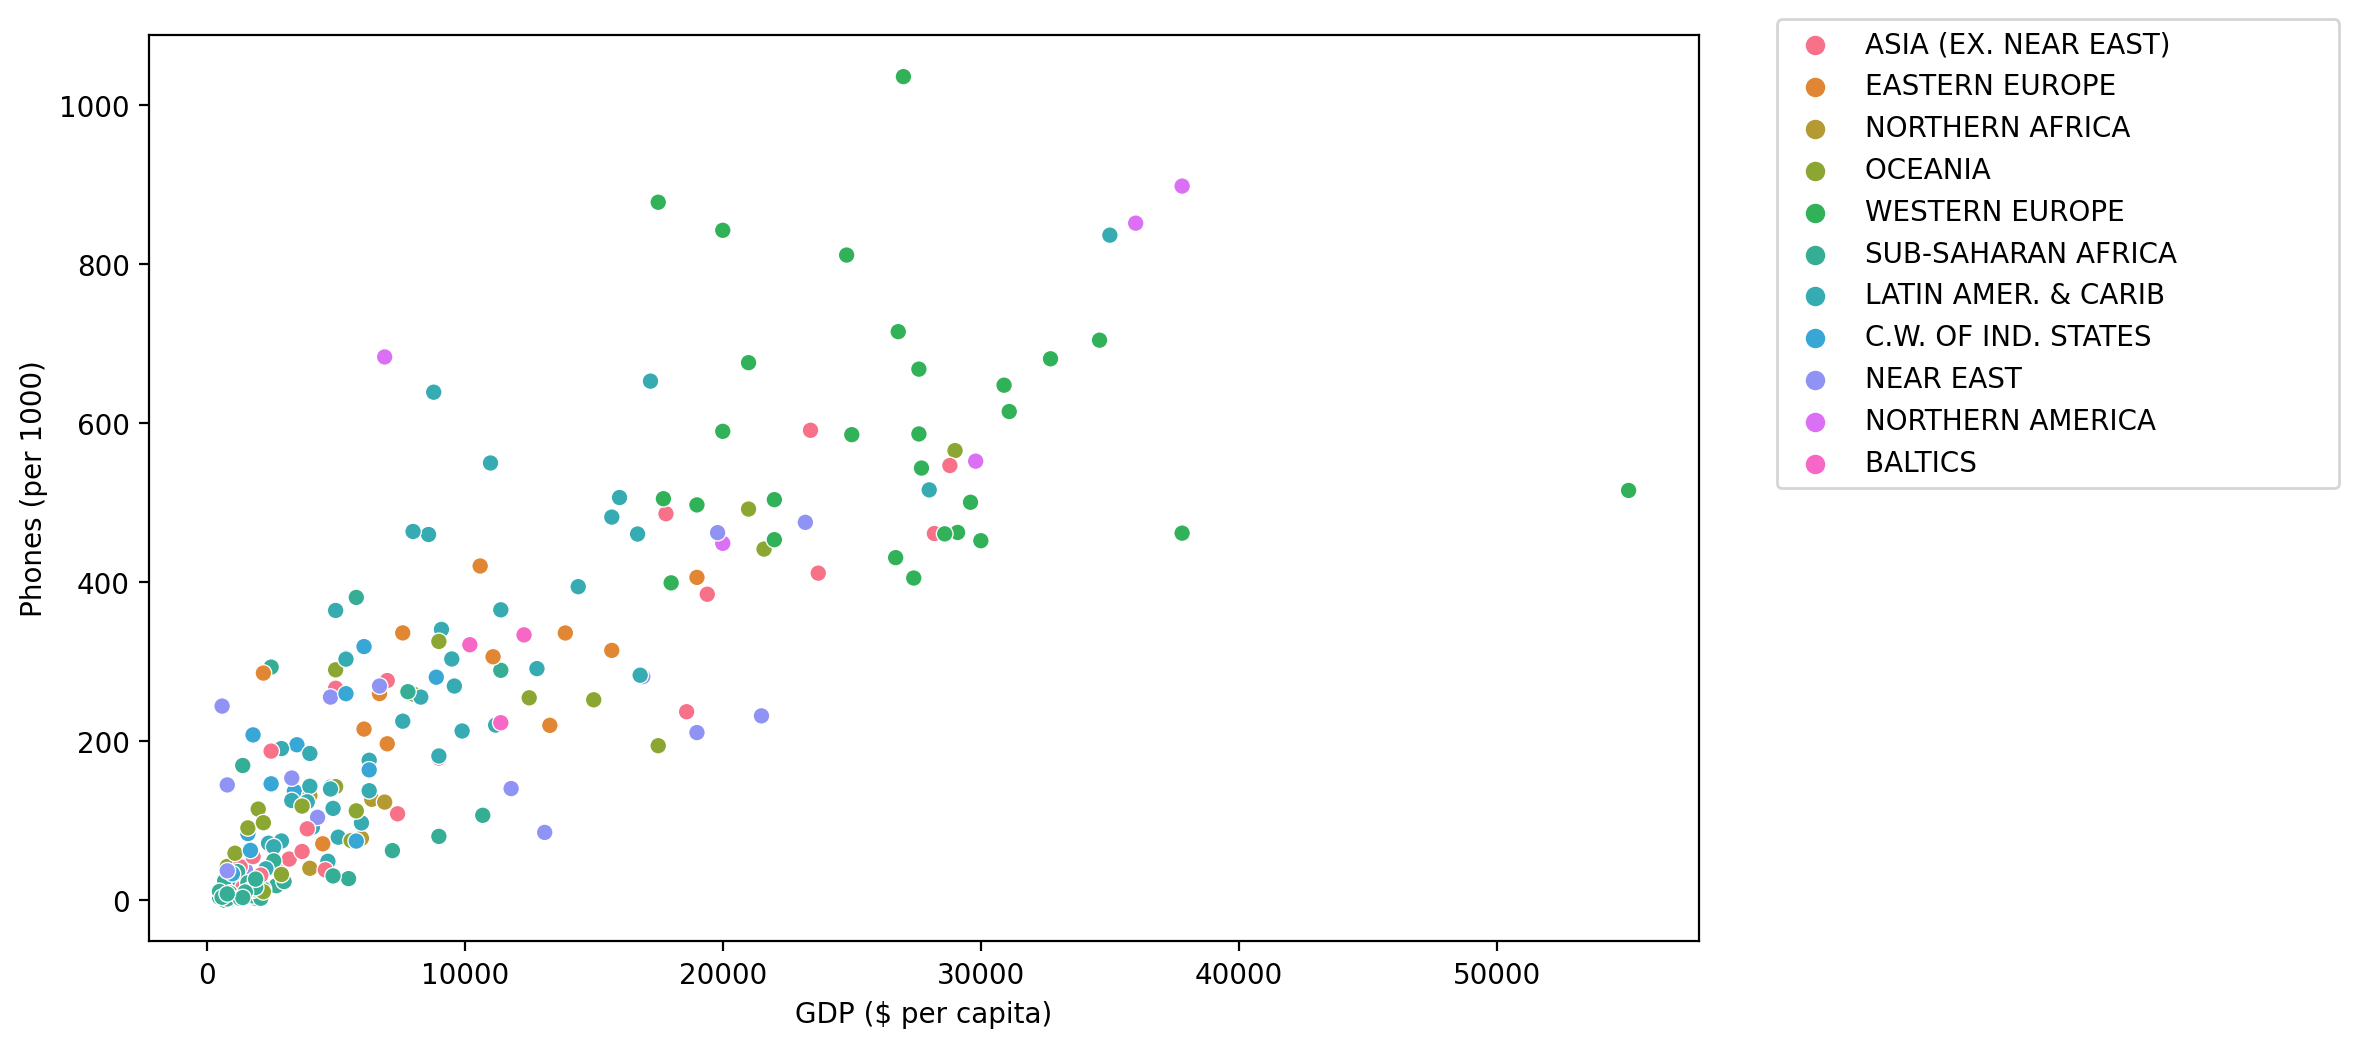

In [9]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x= 'GDP ($ per capita)', y= 'Phones (per 1000)', hue= 'Region')
plt.legend(loc=(1.05, 0.5));

Let's create a scatterplot for showing the relationship between Literacy and GDP

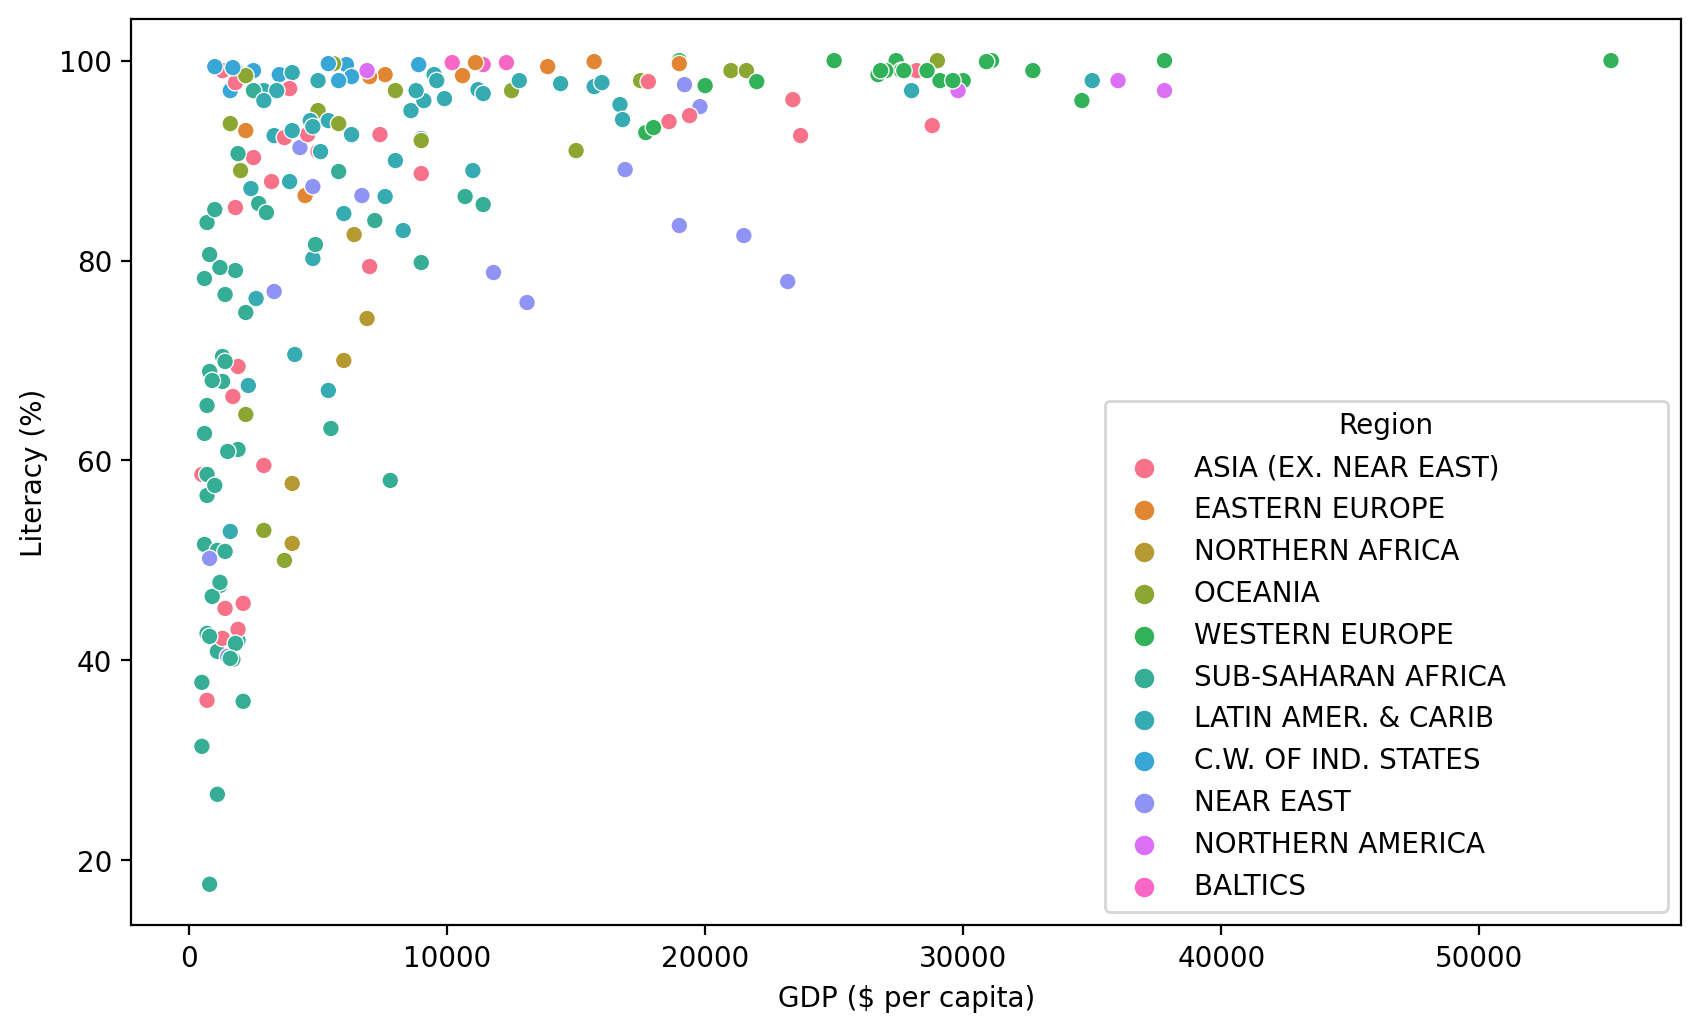

In [10]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x= 'GDP ($ per capita)', y= 'Literacy (%)', hue= 'Region');

This plot is all over the place but we can tell something from this. 
Low Literacy almost guarantees low GDP but Low GDP doesn't always mean low Literacy

Let's create a Heatmap of Correlation between columns

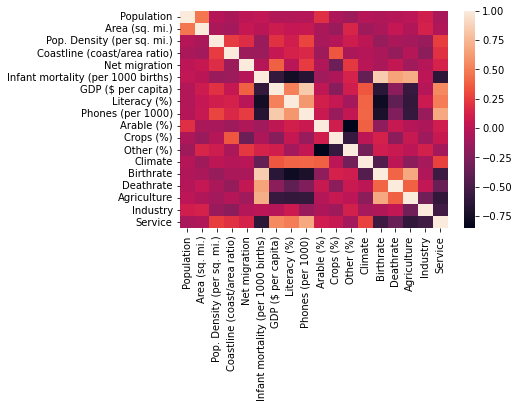

In [11]:
sns.heatmap(df.corr());

Let's create a clustermap of correlations 

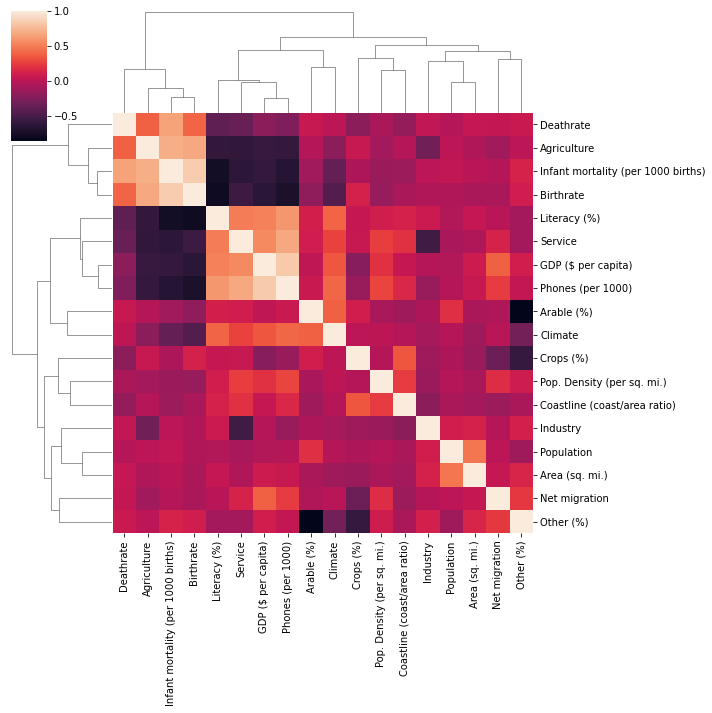

In [12]:
sns.clustermap(df.corr());

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Filling Missing Data

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Let's check the countries with NaN for Agriculture

In [14]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

Eventually all of these countries are either very tiny or unable to perform Agriculture so let's fill those NaN values with 0

In [15]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

Let's check missing values again

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Climate is missing in some countries. Let's fill the missing Climate values based on the mean climate value for its region.

In [17]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

Let's check the missing values again

In [18]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Let's do the same for Literacy percentage

In [19]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

Since we still have some missing data we can drop these countries or try to fill. I will drop these values.

In [20]:
df = df.dropna()

### Data Feature Preparation
Preparing data for clustering 

------------------------------

Country column is a unique identifier string so it won't be useful for clustering. Let's drop Country

In [21]:
df_clean = df.drop("Country", axis=1)

Let's use .get_dummies for categorical data

In [22]:
df_clean = pd.get_dummies(df_clean)

In [23]:
df_clean.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling
Due to some measurements being in terms of percentages and other metrics being total counts, we should scale the data first.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clean)

In [25]:
scaled_df

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting K-Means Model

Let's create multiple K-Means models for different K values and compare them

In [26]:
from sklearn.cluster import KMeans

ssd= []

for k in range (2,30):
    model = KMeans(n_clusters=k)

    model.fit(scaled_df)

    #Sum of Squared Distances of samples to their closest cluster center
    ssd.append(model.inertia_)

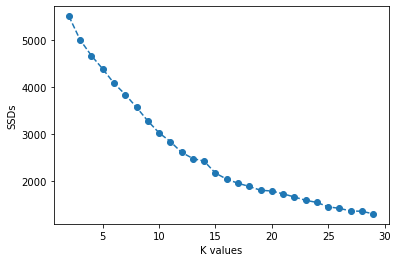

In [27]:
plt.plot(range(2,30), ssd, 'o--')
plt.xlabel('K values')
plt.ylabel('SSDs');

In [28]:
pd.Series(ssd).diff()

0            NaN
1    -503.481233
2    -332.816941
3    -280.748438
4    -302.539298
5    -239.027459
6    -271.953749
7    -288.696348
8    -252.380871
9    -184.407079
10   -229.519194
11   -129.304175
12    -56.813493
13   -253.045134
14   -127.414908
15    -87.487863
16    -67.000461
17    -81.066933
18    -15.910527
19    -60.746900
20    -65.035732
21    -71.535120
22    -44.291119
23    -93.722224
24    -32.223257
25    -56.041005
26     -5.197195
27    -56.521380
dtype: float64

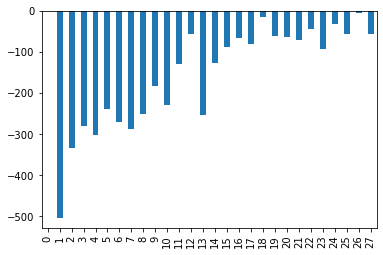

In [29]:
pd.Series(ssd).diff().plot(kind='bar');


### Model Interpretation
We can see that when K= 18 (in ssd array index = 16) has the minimum difference so we will pick K = 18 (It is not 100% correct and the selection is subjective)

In [30]:
model = KMeans(n_clusters=18)
model.fit(scaled_df)
df_clean['K=18 Clusters'] = model.labels_

In [31]:
df_clean.corr()['K=18 Clusters'].sort_values()

Region_LATIN AMER. & CARIB                   -0.490290
Region_SUB-SAHARAN AFRICA                    -0.404889
Birthrate                                    -0.339360
Infant mortality (per 1000 births)           -0.189347
Deathrate                                    -0.123981
Agriculture                                  -0.095342
Other (%)                                    -0.054842
Crops (%)                                    -0.038163
Net migration                                -0.020622
Service                                      -0.016734
Region_ASIA (EX. NEAR EAST)                   0.009072
Region_WESTERN EUROPE                         0.015031
Pop. Density (per sq. mi.)                    0.065287
Region_NEAR EAST                              0.072477
Industry                                      0.082211
GDP ($ per capita)                            0.105763
Phones (per 1000)                             0.127773
Population                                    0.132704
Coastline 

## Geographical Visualisation

In [32]:
#We need iso codes for countries for this
iso_codes = pd.read_csv('../data/country_iso_codes.csv')
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [33]:
df['ISO Code'] = df['Country'].map(iso_mapping)
df['Cluster'] = model.labels_
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,4
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,11
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,14
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,8
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,6


In [34]:
import plotly.express as px

fig = px.choropleth(df, locations = "ISO Code",
                    color = 'Cluster',
                    hover_name = 'Country',
                    color_continuous_scale='Turbo')
fig.show()